# Finance Exercises: Factor Models

Given a stock, the daily return of a stock today is today's closing price divided by yesterday's closing price; we then subtract 1 and multiply by 100 to get a percentage.

One of the most well-known factor models is the Capital Asset Pricing Model (CAPM), which takes the form: $E[R_s]=R_f +\beta(E[R_m]−R_f)$. Here, $R_s$ is the return for some security of interest, $R_m$ is the return for some market index such as the S&P500. $R_f$ is the risk-free return, typically the interest rate on US treasuries or assumed to be zero for simplicity.

This is really just a simple linear regression and $\beta$ is the slope for the "line of best fit." With simple linear regression, $\beta$ is just $\text{Cov}(E[R_s],E[R_m])/\text{Var}(E[R_m])$ where I'm thinking of these as arrays containing finitely many points of historic data telling us about the returns.

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the ticker symbol
ticker_symbol = "AAPL" # Apple

# Create a Ticker object
ticker = yf.Ticker(ticker_symbol)

# Fetch historical market data
historical_data = ticker.history(period="1y")  # data for the last year
print("Historical Data:")
print(historical_data)

# Fetch basic financials
financials = ticker.financials
print("\nFinancials:")
print(financials)

# Fetch stock actions like dividends and splits
actions = ticker.actions
print("\nStock Actions:")
print(actions)

Historical Data:
                                 Open        High         Low       Close  \
Date                                                                        
2023-11-30 00:00:00-05:00  188.914507  189.392178  187.272557  189.023972   
2023-12-01 00:00:00-05:00  189.402111  190.626110  188.307468  190.307678   
2023-12-04 00:00:00-05:00  189.053807  189.123473  186.536142  188.506485   
2023-12-05 00:00:00-05:00  189.282708  193.452269  189.252841  192.477051   
2023-12-06 00:00:00-05:00  193.502021  193.810508  191.173433  191.382416   
...                               ...         ...         ...         ...   
2024-11-22 00:00:00-05:00  228.059998  230.720001  228.059998  229.869995   
2024-11-25 00:00:00-05:00  231.460007  233.250000  229.740005  232.869995   
2024-11-26 00:00:00-05:00  233.330002  235.570007  233.330002  235.059998   
2024-11-27 00:00:00-05:00  234.470001  235.690002  233.809998  234.929993   
2024-11-29 00:00:00-05:00  234.809998  237.809998  233.9700

In [3]:
apple=pd.DataFrame(historical_data)

In [4]:
apple

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-11-30 00:00:00-05:00,188.914507,189.392178,187.272557,189.023972,48794400,0.0,0.0
2023-12-01 00:00:00-05:00,189.402111,190.626110,188.307468,190.307678,45679300,0.0,0.0
2023-12-04 00:00:00-05:00,189.053807,189.123473,186.536142,188.506485,43389500,0.0,0.0
2023-12-05 00:00:00-05:00,189.282708,193.452269,189.252841,192.477051,66628400,0.0,0.0
2023-12-06 00:00:00-05:00,193.502021,193.810508,191.173433,191.382416,41089700,0.0,0.0
...,...,...,...,...,...,...,...
2024-11-22 00:00:00-05:00,228.059998,230.720001,228.059998,229.869995,38168300,0.0,0.0
2024-11-25 00:00:00-05:00,231.460007,233.250000,229.740005,232.869995,90152800,0.0,0.0
2024-11-26 00:00:00-05:00,233.330002,235.570007,233.330002,235.059998,45986200,0.0,0.0


In [5]:
apple['Daily Returns %'] = ((apple['Close']/apple['Close'].shift(1))-1)*100

In [6]:
apple

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily Returns %
Date,,,,,,,,
2023-11-30 00:00:00-05:00,188.914507,189.392178,187.272557,189.023972,48794400,0.0,0.0,NaN
2023-12-01 00:00:00-05:00,189.402111,190.626110,188.307468,190.307678,45679300,0.0,0.0,0.679124
2023-12-04 00:00:00-05:00,189.053807,189.123473,186.536142,188.506485,43389500,0.0,0.0,-0.946464
2023-12-05 00:00:00-05:00,189.282708,193.452269,189.252841,192.477051,66628400,0.0,0.0,2.106328
2023-12-06 00:00:00-05:00,193.502021,193.810508,191.173433,191.382416,41089700,0.0,0.0,-0.568709
...,...,...,...,...,...,...,...,...
2024-11-22 00:00:00-05:00,228.059998,230.720001,228.059998,229.869995,38168300,0.0,0.0,0.590754
2024-11-25 00:00:00-05:00,231.460007,233.250000,229.740005,232.869995,90152800,0.0,0.0,1.305086
2024-11-26 00:00:00-05:00,233.330002,235.570007,233.330002,235.059998,45986200,0.0,0.0,0.940440


In [7]:
# market index
SP500 = yf.Ticker('^GSPC')

# Fetch historical market data
historical_data2 = SP500.history(period="1y")  # data for the last year
print("Historical Data:")
print(historical_data2)

Historical Data:
                                  Open         High          Low        Close  \
Date                                                                            
2023-11-30 00:00:00-05:00  4554.870117  4569.890137  4537.240234  4567.799805   
2023-12-01 00:00:00-05:00  4559.430176  4599.390137  4554.709961  4594.629883   
2023-12-04 00:00:00-05:00  4564.370117  4572.370117  4546.720215  4569.779785   
2023-12-05 00:00:00-05:00  4557.250000  4578.560059  4551.680176  4567.180176   
2023-12-06 00:00:00-05:00  4586.229980  4590.740234  4546.500000  4549.339844   
...                                ...          ...          ...          ...   
2024-11-22 00:00:00-05:00  5944.359863  5972.899902  5944.359863  5969.339844   
2024-11-25 00:00:00-05:00  5992.279785  6020.750000  5963.910156  5987.370117   
2024-11-26 00:00:00-05:00  6000.029785  6025.419922  5992.270020  6021.629883   
2024-11-27 00:00:00-05:00  6014.109863  6020.160156  5984.870117  5998.740234   
2024-11-29 

In [8]:
sp500 = pd.DataFrame(historical_data2)

In [9]:
sp500['Daily Returns %'] = ((sp500['Close']/sp500['Close'].shift(1))-1)*100

In [10]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily Returns %
Date,,,,,,,,
2023-11-30 00:00:00-05:00,4554.870117,4569.890137,4537.240234,4567.799805,5399300000,0.0,0.0,NaN
2023-12-01 00:00:00-05:00,4559.430176,4599.390137,4554.709961,4594.629883,4397120000,0.0,0.0,0.587374
2023-12-04 00:00:00-05:00,4564.370117,4572.370117,4546.720215,4569.779785,4369910000,0.0,0.0,-0.540851
2023-12-05 00:00:00-05:00,4557.250000,4578.560059,4551.680176,4567.180176,3909950000,0.0,0.0,-0.056887
2023-12-06 00:00:00-05:00,4586.229980,4590.740234,4546.500000,4549.339844,4245680000,0.0,0.0,-0.390620
...,...,...,...,...,...,...,...,...
2024-11-22 00:00:00-05:00,5944.359863,5972.899902,5944.359863,5969.339844,4141420000,0.0,0.0,0.346796
2024-11-25 00:00:00-05:00,5992.279785,6020.750000,5963.910156,5987.370117,5633150000,0.0,0.0,0.302048
2024-11-26 00:00:00-05:00,6000.029785,6025.419922,5992.270020,6021.629883,3835170000,0.0,0.0,0.572201


In [11]:
# getting just the daily returns (and dropping the 'NaN' values)

sp500_daily_returns = sp500['Daily Returns %'].values
sp500_daily_returns=sp500_daily_returns[1:]

In [12]:
apple_daily_returns = apple['Daily Returns %'].values
apple_daily_returns=apple_daily_returns[1:]


In [13]:
matrix = np.cov(apple_daily_returns,sp500_daily_returns)

In [14]:
# covariance divided by variance of market return
matrix[0][1]/matrix[1][1]

0.9803717234472434

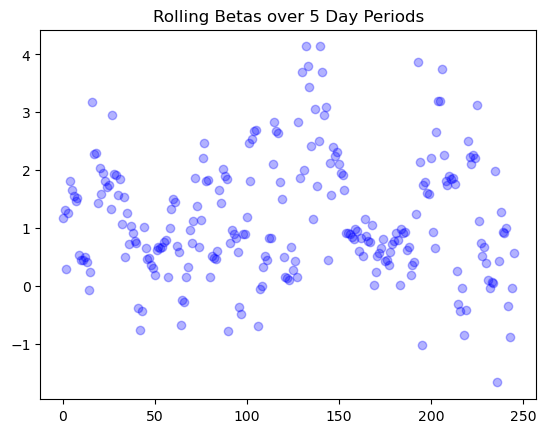

In [15]:
# Let's compute a "rolling" beta where we compute beta for a course of 5 days
n=5
betas = []
for i in range(len(sp500_daily_returns)-n):
    matrix = np.cov(apple_daily_returns[i:i+n],sp500_daily_returns[i:i+n])
    betas.append(matrix[0][1]/matrix[1][1])
l = np.arange(0,len(betas),1)
plt.scatter(l,betas, color = 'b', alpha = 0.3)

plt.title(f'Rolling Betas over {n} Day Periods')
plt.show()

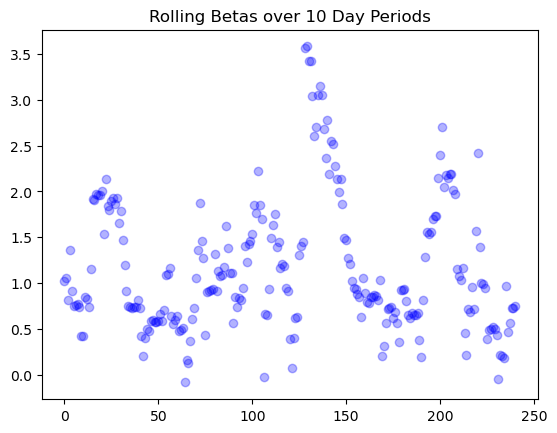

In [16]:
# Let's compute a "rolling" beta where we compute beta for a course of 10 days
n=10
betas = []
for i in range(len(sp500_daily_returns)-n):
    matrix = np.cov(apple_daily_returns[i:i+n],sp500_daily_returns[i:i+n])
    betas.append(matrix[0][1]/matrix[1][1])
l = np.arange(0,len(betas),1)
plt.scatter(l,betas, color = 'b', alpha = 0.3)

plt.title(f'Rolling Betas over {n} Day Periods')
plt.show()

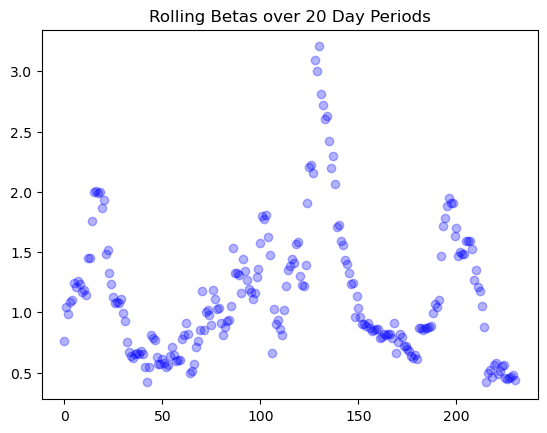

In [17]:
# Let's compute a "rolling" beta where we compute beta for a course of 20 days
n=20
betas = []
for i in range(len(sp500_daily_returns)-n):
    matrix = np.cov(apple_daily_returns[i:i+n],sp500_daily_returns[i:i+n])
    betas.append(matrix[0][1]/matrix[1][1])
l = np.arange(0,len(betas),1)
plt.scatter(l,betas, color = 'b', alpha = 0.3)

plt.title(f'Rolling Betas over {n} Day Periods')
plt.show()

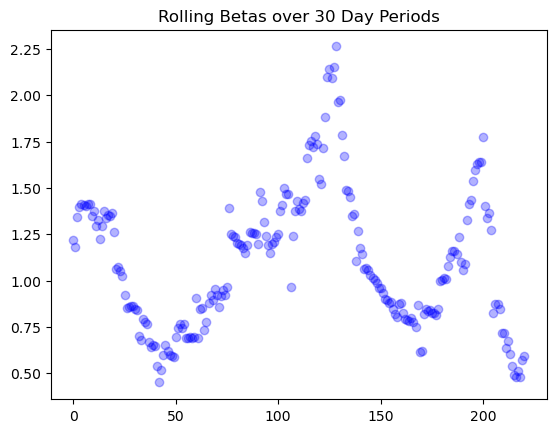

In [18]:
# Let's compute a "rolling" beta where we compute beta for a course of 30 days
n=30
betas = []
for i in range(len(sp500_daily_returns)-n):
    matrix = np.cov(apple_daily_returns[i:i+n],sp500_daily_returns[i:i+n])
    betas.append(matrix[0][1]/matrix[1][1])
l = np.arange(0,len(betas),1)
plt.scatter(l,betas, color = 'b', alpha = 0.3)

plt.title(f'Rolling Betas over {n} Day Periods')
plt.show()

It definitely seems there is some kind of periodic behavior or trend

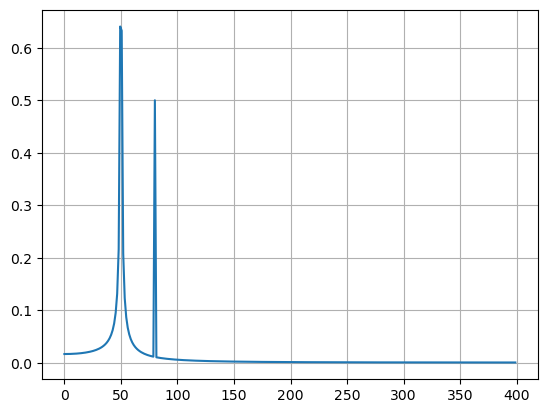

In [19]:
from scipy.fft import fft, fftfreq

# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
xf = fftfreq(N, T)[:N//2]

plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

Trying Prophet for forecasting

In [20]:
from prophet import Prophet

In [21]:
n=5
betas = []

for i in range(len(sp500_daily_returns)-n):
    matrix = np.cov(apple_daily_returns[i:i+n],sp500_daily_returns[i:i+n])
    betas.append(matrix[0][1]/matrix[1][1])

In [22]:
# the date was the index, now it becomes a column
sp500.reset_index(inplace=True)

In [23]:
dates=sp500['Date'].values

In [24]:
len(dates)

252

In [25]:
len(betas)

246

In [26]:
dates = dates[:-6]

In [27]:
X = pd.DataFrame({'ds': dates, 'y': betas})

In [28]:
X

,ds,y
0,2023-11-30 05:00:00,1.174152
1,2023-12-01 05:00:00,1.307637
2,2023-12-04 05:00:00,0.290249
3,2023-12-05 05:00:00,1.258481
4,2023-12-06 05:00:00,1.811881
...,...,...
241,2024-11-14 05:00:00,0.992933
242,2024-11-15 05:00:00,-0.348338
243,2024-11-18 05:00:00,-0.886241
244,2024-11-19 05:00:00,-0.039080


In [29]:
m=Prophet()

In [30]:
m.fit(X)

20:38:13 - cmdstanpy - INFO - Chain [1] start processing
20:38:13 - cmdstanpy - INFO - Chain [1] done processing


In [31]:
future=m.make_future_dataframe(periods=5)

In [32]:
forecast=m.predict(future)

In [33]:
X[-10:]

,ds,y
236,2024-11-07 05:00:00,-1.667914
237,2024-11-08 05:00:00,0.430524
238,2024-11-11 05:00:00,1.282077
239,2024-11-12 05:00:00,0.927798
240,2024-11-13 05:00:00,0.923124
241,2024-11-14 05:00:00,0.992933
242,2024-11-15 05:00:00,-0.348338
243,2024-11-18 05:00:00,-0.886241
244,2024-11-19 05:00:00,-0.039080
245,2024-11-20 05:00:00,0.574364


In [34]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-15:]

,ds,yhat,yhat_lower,yhat_upper
236,2024-11-07 05:00:00,1.019200,-0.333669,2.291129
237,2024-11-08 05:00:00,1.035690,-0.324791,2.362912
238,2024-11-11 05:00:00,1.082056,-0.316551,2.349574
239,2024-11-12 05:00:00,1.087758,-0.253863,2.411317
240,2024-11-13 05:00:00,1.169543,-0.255886,2.512764
241,2024-11-14 05:00:00,1.015619,-0.295259,2.325297
242,2024-11-15 05:00:00,1.032110,-0.283762,2.363856
243,2024-11-18 05:00:00,1.078476,-0.243190,2.365554
244,2024-11-19 05:00:00,1.084178,-0.214149,2.483674
245,2024-11-20 05:00:00,1.165962,-0.153278,2.551459


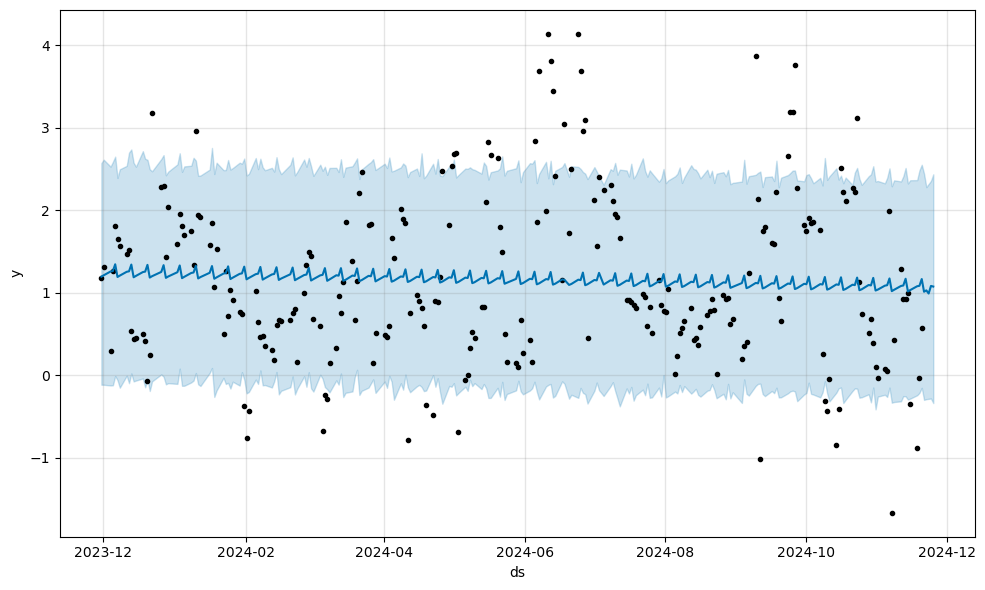

In [35]:
fig=m.plot(forecast)

I'm not sure why the prediction has such small and consistent oscillations...I am just using the Prophet "out of the box" without tuning hyperparameters.

In [36]:
# Let's compute a "rolling" beta where we compute beta for a course of 30 days
n=30
betas = []
for i in range(len(sp500_daily_returns)-n):
    matrix = np.cov(apple_daily_returns[i:i+n],sp500_daily_returns[i:i+n])
    betas.append(matrix[0][1]/matrix[1][1])


In [37]:
dates=sp500['Date'].values

In [38]:
dates = dates[:-31]

In [39]:
X = pd.DataFrame({'ds': dates, 'y': betas})

In [40]:
m=Prophet()

In [41]:
m.fit(X)

20:38:14 - cmdstanpy - INFO - Chain [1] start processing
20:38:15 - cmdstanpy - INFO - Chain [1] done processing


In [42]:
future=m.make_future_dataframe(periods=5)

In [43]:
forecast=m.predict(future)

In [44]:
X[-10:]

,ds,y
211,2024-10-03 04:00:00,0.634222
212,2024-10-04 04:00:00,0.672373
213,2024-10-07 04:00:00,0.600701
214,2024-10-08 04:00:00,0.539270
215,2024-10-09 04:00:00,0.491569
216,2024-10-10 04:00:00,0.479539
217,2024-10-11 04:00:00,0.512452
218,2024-10-14 04:00:00,0.476940
219,2024-10-15 04:00:00,0.572429
220,2024-10-16 04:00:00,0.591600


In [45]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-15:]

,ds,yhat,yhat_lower,yhat_upper
211,2024-10-03 04:00:00,0.944756,0.514127,1.376513
212,2024-10-04 04:00:00,0.954489,0.545467,1.392336
213,2024-10-07 04:00:00,0.940775,0.481425,1.361372
214,2024-10-08 04:00:00,0.937319,0.533123,1.323196
215,2024-10-09 04:00:00,0.938578,0.521631,1.345389
216,2024-10-10 04:00:00,0.927599,0.490422,1.366812
217,2024-10-11 04:00:00,0.937332,0.499007,1.378587
218,2024-10-14 04:00:00,0.923618,0.482038,1.364412
219,2024-10-15 04:00:00,0.920162,0.476812,1.332320
220,2024-10-16 04:00:00,0.921421,0.527342,1.375615


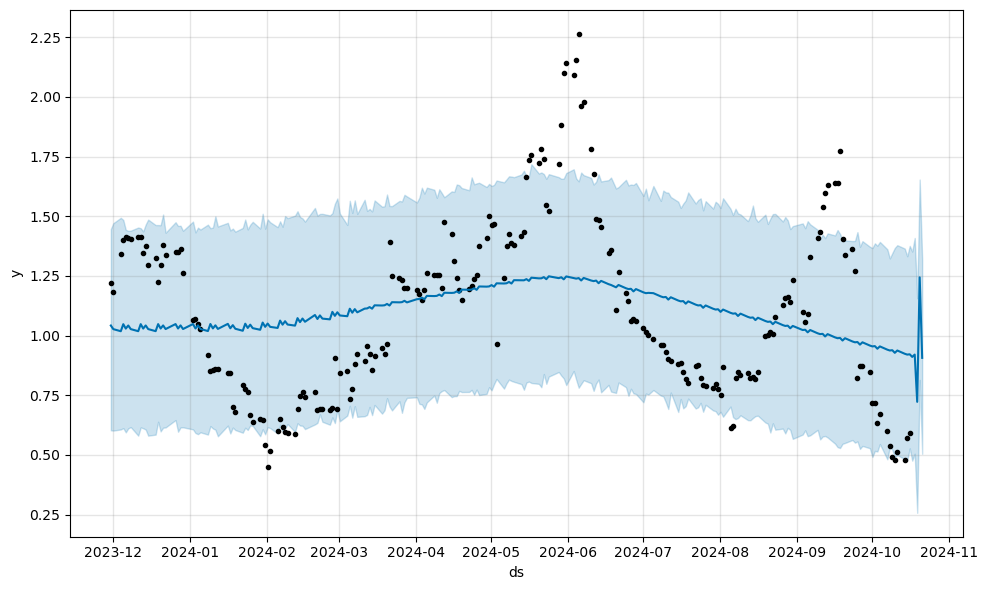

In [46]:
fig=m.plot(forecast)

Seems really off; there is some seeming seasonality but Prophet doesn't seem to detect it. Weird jump at the end